# Assignment 1: Decision Tree Grid Search
## DTSC 680: Applied Machine Learning

## Name: 

## Directions

The main purpose of this assignment is for you to gain experience creating and visualizing a Decision Tree along with sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [1]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

NOTE: you will need to use the ENTIRE dataset for this assignment, not just the first two columns.

In [2]:
### ENTER CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`. 
6. Print the accuracy score to the screen.


In [3]:
### ENTER CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
### ENTER CODE HERE ###
from sklearn.metrics import accuracy_score

preds = tree_clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)
print('Accuracy=%s' % (acc_score))

Accuracy=0.95


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor: 
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid. 
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [16]:
### ENTER CODE HERE ###
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[2,3,4,5,8,16,32], 'max_leaf_nodes':list(range(2,20,1)), 'min_samples_split':[2,3,4,5,8,12,16,20]}
grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, verbose=1,cv=3)
grid_search_cv.fit(X_train,y_train)
print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
The best parameters are:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


In [7]:
### ENTER CODE HERE ###

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = tree_clf.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
prec_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.95
Precision=0.95
Recall=0.95


In [ ]:
import pandas as pd
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)
df = pd.concat([df1, df2], axis=1)
df

## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [14]:
### ENTER CODE HERE ###
from sklearn.tree import export_text
tree2_clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_split=2, random_state=42)
tree2_clf.fit(X_train,y_train)
print(export_text(tree2_clf, feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']))


|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 5.05
|   |   |--- class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. Use `filled=True` as an argument to the method to add color to the image.

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

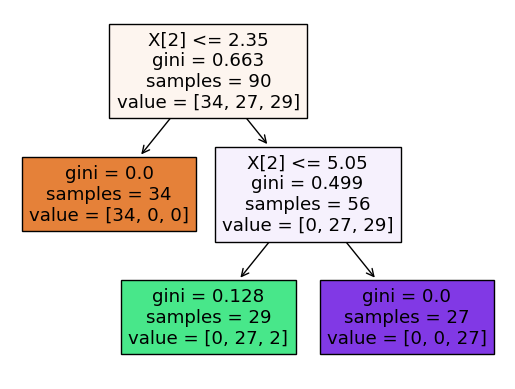

In [15]:
### ENTER CODE HERE ###
from sklearn.tree import plot_tree
plot_tree(tree2_clf, filled=True)

## Critical Analysis

1. In your own words (a sentence or two) explain what setting the GridSearchCV hyperparameter `verbose` to `1` does. Please provide a citation. (A link to the website or the name of the book where you found this answer will suffice.)

2. In your own words, describe or interpret the role of the gini score criterion in the decision tree algorithm. How does this compare to the entropy impurity measure? Finally, sklearn uses the CART (Classification and Regression Tree) algorithm to train Decision Trees. How does this algorithm determine the feature and threshold value to use for splitting at each step of the Decision Tree algorithm? It may be helpful to look at outside resources to help you answer these questions (The YouTube channel ["StatQuest"](https://youtu.be/7VeUPuFGJHk) has some excellent videos on Decision Trees for those of you that like visual explanations.) 

Make sure that you answer all the questions above. I am looking for **meaningful content** here that **goes into detail**. Don't just copy from the textbook or rush through answering this question.

(Write analysis here.)
1. In the case of GridSearchCV, the verbose hyperparameter is used in a relatively literal sense.  Verbose is an adjective meaning "expressed in more words than are needed".  The "in more words" part is what applies for GridSearchCV, so the larger the integer assigned to this parameter, the "more words" that will be used in the description provided in the output.  When verbose=0 (default for GridSearchCV), then no description is provided.  According to the scikit-learn user guide, Pedregosa et al. (2011), applying verbose=1 to a GridSearchCV will provide the first system message for each fold and parameter computation time.

Citation:
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

2. Generally speaking, the gini score is a measure of impurity for a node, but more specifically, it is a probability that a random instance in the node is classified incorrectly by the algorithm.
    gini=0 is pure so it is a low probability that an instance gets missclassified, gini=1 is a high likelihood that an instance gets missclassified.

Entropy is also, generally speaking, a measure of impurity, but beyond that it is a measure of disorder with 0 being no/low disorder and 1 being high disorder.  
    The entropy of a node is disposition of instances assigned to each class.  0 being all assigned to one class, 1 being an even split.

https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c 
https://www.datacamp.com/tutorial/decision-tree-classification-python 

## Ungraded Critical Thinking Question

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased. Is that what you had expected? We perform a round of grid searching in order to elucidate the optimal hyperparameter values. Why, then, has the accuracy score decreased? Most importantly, what caused this decrease in the accuracy score and why? Explain your answer.

(Write analysis here.)
I did not expect for the accuracy score to decrease, and I did have to go double check my work; however, it was not a large shock, it was mentioned in the lectures as well as some additional reading that I did that this is possible.  The GridSearchCV is not looking for the optimal combination of hyperparameter values, rather it is identifying the optimal value at each individual level, starting at the top and moving down.  It does not back track to see if there are better combinations, just what is optimal for that algorithm at that time in the process.